C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\riul0\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


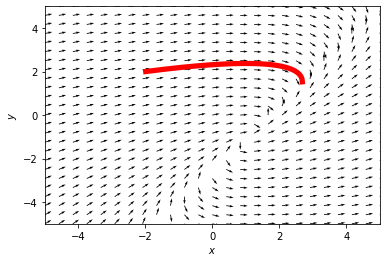

In [4]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (x[0]-1)/(3*x[0]-2*x[1]-5)
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[-2,2]]
color=['r','b']
listY = []

for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,25),np.linspace(-5,5,25) )

V = (X-1)/(3*X-2*Y-5)


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

y_exact = 2 + -2*np.exp((-2*S[:,0]))
#plt.plot(S[:,0], y_exact, color = "g")




##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

In [2]:
## k levels?7
levels_solution = []

x,y= -2,2
K3= np.log(abs(-1+(y+1)/(x-1))) - 2*np.log(abs(-1+2*((y+1)/(x-1)))) -np.log(abs(x-1))
print('k3 value is',K3)
levels_solution.append(K3)


k3 value is -2.6026896854443837


In [3]:
## Levels we are interested to compare solution from gradient field
print(levels_solution)
levels=sorted(levels_solution)
print(levels) ## Ordenado para plotear las contour curves

[-2.6026896854443837]
[-2.6026896854443837]


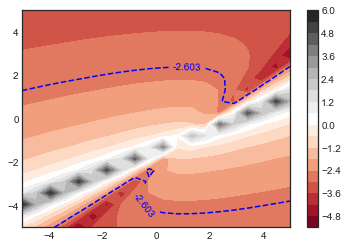

In [5]:
%matplotlib inline
plt.style.use('seaborn-white')

xs = np.linspace(-5, 5, 20)
ys = np.linspace(-5, 5, 20)

def fs(xs, ys):  ## y_exact equation without constant
    
    return np.log(abs(-1+(ys+1)/(xs-1))) - 2*np.log(abs(-1+2*((ys+1)/(xs-1)))) -np.log(abs(xs-1))

X, Y = np.meshgrid(xs, ys)
Z = fs(X,Y)

contours = plt.contour(X, Y, Z, levels, colors='blue')
plt.clabel(contours, inline=1, fontsize=10)

plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()